In [1]:
#EXERCISE 1
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas

In [2]:
example = [
    ['milk', 'bread', 'apples', 'cereal', 'jelly', 
     'cookies', 'salad', 'tomatoes'],
    ['beer', 'milk', 'chips', 'salsa', 'grapes', 
     'wine', 'potatoes', 'eggs', 'carrots'],
    ['diapers', 'baby formula', 'milk', 'bread', 
     'chicken', 'asparagus', 'cookies'],
    ['milk', 'cookies', 'chicken', 'asparagus', 
     'broccoli', 'cereal', 'orange juice'],
    ['steak', 'asparagus', 'broccoli', 'chips', 
     'salsa', 'ketchup', 'potatoes', 'salad'],
    ['beer', 'salsa', 'asparagus', 'wine', 'cheese', 
     'crackers', 'strawberries', 'cookies'],
    ['chocolate cake', 'strawberries', 'wine', 'cheese', 
     'beer', 'milk', 'orange juice'],
    ['chicken', 'peas', 'broccoli', 'milk', 'bread', 
     'eggs', 'potatoes', 'ketchup', 'crackers'],
    ['eggs', 'bread', 'cheese', 'turkey', 'salad', 
     'tomatoes', 'wine', 'steak', 'carrots'],
    ['bread', 'milk', 'tomatoes', 'cereal', 'chicken', 
     'turkey', 'chips', 'salsa', 'diapers']
]

In [3]:
#EXERCISE 2
N = len(example)
f_x = sum(['milk' in i for i in example]) # milk
f_y = sum(['bread' in i for i in example]) # bread
f_x_y = sum([
    all(w in i for w in ['milk', 'bread']) 
    for i in example
])

print(
    "N = {}\n".format(N) + 
    "Freq(x) = {}\n".format(f_x) + 
    "Freq(y) = {}\n".format(f_y) + 
    "Freq(x, y) = {}".format(f_x_y)
)

N = 10
Freq(x) = 7
Freq(y) = 5
Freq(x, y) = 4


In [4]:
support = f_x_y / N
print("Support = {}".format(round(support, 4)))

Support = 0.4


In [5]:
confidence = support / (f_x / N)
print("Confidence = {}".format(round(confidence, 4)))

Confidence = 0.5714


In [6]:
lift = confidence / (f_y / N)
print("Lift = {}".format(round(lift, 4)))

Lift = 1.1429


In [7]:
leverage = support - ((f_x / N) * (f_y / N))
print("Leverage = {}".format(round(leverage, 4)))

Leverage = 0.05


In [8]:
conviction = (1 - (f_y / N)) / (1 - confidence)
print("Conviction = {}".format(round(conviction, 4)))

Conviction = 1.1667


In [9]:
#EXERCISE 3
online = pandas.read_excel(
    io="Online Retail.xlsx", 
    sheet_name="Online Retail", header=0
)

In [10]:
online.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [11]:
online.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
print(
"Data dimension (row count, col count): {dim}"
.format(dim=online.shape)
)
print(
"Count of unique invoice numbers: {cnt}"
.format(cnt=online.InvoiceNo.nunique())
)
print(
"Count of unique customer ids: {cnt}"
.format(cnt=online.CustomerID.nunique())
)

Data dimension (row count, col count): (541909, 8)
Count of unique invoice numbers: 25900
Count of unique customer ids: 4372


In [13]:
#EXERCISE 4
online['IsCPresent'] = (
    online['InvoiceNo']
    .astype(str)
    .apply(lambda x: 1 if x.find('C') != -1 else 0)
)

In [14]:
online1 = (
    online
    # filter out non-positive quantity values
    .loc[online["Quantity"] > 0]
    # remove InvoiceNos starting with C
    .loc[online['IsCPresent'] != 1]
    # column filtering
    .loc[:, ["InvoiceNo", "Description"]]
    # dropping all rows with at least one missing value
    .dropna()
)

In [15]:
online1.head(10)

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [16]:
print(
    "Data dimension (row count, col count): {dim}"
    .format(dim=online1.shape)
)
print(
    "Count of unique invoice numbers: {cnt}"
    .format(cnt=online1.InvoiceNo.nunique())
)


Data dimension (row count, col count): (530693, 2)
Count of unique invoice numbers: 20136


In [17]:
invoice_no_list = online1.InvoiceNo.tolist()
invoice_no_list = list(set(invoice_no_list))
print(
    "Length of list of invoice numbers: {ln}"
    .format(ln=len(invoice_no_list))
)

Length of list of invoice numbers: 20136


In [18]:
subset_invoice_no_list = invoice_no_list[0:5000]
print(
    "Length of subset list of invoice numbers: {ln}"
    .format(ln=len(subset_invoice_no_list))
)

Length of subset list of invoice numbers: 5000


In [19]:
online1 = online1.loc[online1["InvoiceNo"].isin(subset_invoice_no_list)]

In [20]:
online1.head(10)

,InvoiceNo,Description
229435,557056,SET OF 4 KNICK KNACK TINS DOILEY
229436,557057,RED POLKADOT BEAKER
229437,557057,BLUE POLKADOT BEAKER
229438,557057,DAIRY MAID TOASTRACK
229439,557057,BLUE EGG SPOON
229440,557057,RED EGG SPOON
229441,557057,MODERN FLORAL STATIONERY SET
229442,557057,FLORAL FOLK STATIONERY SET
229443,557057,CERAMIC BOWL WITH LOVE HEART DESIGN
229444,557057,WOOD STAMP SET THANK YOU


In [21]:
print(
    "Data dimension (row count, col count): {dim}"
    .format(dim=online1.shape)
)
print(
    "Count of unique invoice numbers: {cnt}"
    .format(cnt=online1.InvoiceNo.nunique())
)


Data dimension (row count, col count): (129769, 2)
Count of unique invoice numbers: 5000


In [22]:
invoice_item_list = []
for num in list(set(online1.InvoiceNo.tolist())):
    # filter data set down to one invoice number
    tmp_df = online1.loc[online1['InvoiceNo'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)
    
print(invoice_item_list[1:5])

[['RED POLKADOT BEAKER ', 'BLUE POLKADOT BEAKER ', 'DAIRY MAID TOASTRACK', 'BLUE EGG  SPOON', 'RED  EGG  SPOON', 'MODERN FLORAL STATIONERY SET', 'FLORAL FOLK STATIONERY SET', 'CERAMIC BOWL WITH LOVE HEART DESIGN', 'WOOD STAMP SET THANK YOU', 'WOOD STAMP SET HAPPY BIRTHDAY', 'PENS ASSORTED SPACEBALL', 'PENS ASSORTED FUNNY FACE', 'PENS ASSORTED FUNKY JEWELED ', 'SCOTTIE DOGS BABY BIB', 'CHARLIE AND LOLA TABLE TINS', 'CHARLIE & LOLA WASTEPAPER BIN FLORA', 'CHARLIE & LOLA WASTEPAPER BIN BLUE', 'CHARLIE AND LOLA FIGURES TINS', 'TV DINNER TRAY DOLLY GIRL', 'SET/20 RED RETROSPOT PAPER NAPKINS ', 'MINT KITCHEN SCALES', 'RED KITCHEN SCALES', '36 FOIL HEART CAKE CASES', '36 FOIL STAR CAKE CASES ', 'ILLUSTRATED CAT BOWL ', 'POTTING SHED TEA MUG', 'CERAMIC STRAWBERRY DESIGN MUG', 'RED RETROSPOT SHOPPER BAG', 'BUTTON BOX ', 'MINI CAKE STAND  HANGING STRAWBERY', 'LUNCH BAG DOILEY PATTERN ', 'JUMBO BAG STRAWBERRY', 'STRAWBERRY SHOPPER BAG', 'SUKI  SHOULDER BAG', 'JUMBO BAG ALPHABET', 'SKULL SHOULDER 

In [23]:
#EXERCISE 5
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)
print(online_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [24]:
online_encoder_df = pandas.DataFrame(
    online_encoder_array, 
    columns=online_encoder.columns_
)

# this is a very big table, so for more 
# easy viewing only a subset is printed
online_encoder_df.loc[
    4970:4979, 
    online_encoder_df.columns.tolist()[0:8]
]

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON
4970,False,False,False,False,False,False,False,False
4971,False,False,True,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,False,False,False,False,False,False
4974,False,False,False,False,False,False,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


In [25]:
print(
    "Data dimension (row count, col count): {dim}"
    .format(dim=online_encoder_df.shape)
)

Data dimension (row count, col count): (5000, 3334)


In [26]:
#EXERCISE 6
mod = mlxtend.frequent_patterns.apriori(online_encoder_df)
mod

,support,itemsets


In [27]:
mod_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.01
)
mod_minsupport.loc[0:6]

,support,itemsets
0,0.0168,(2)
1,0.0150,(10)
2,0.0116,(15)
3,0.0144,(18)
4,0.0210,(19)
5,0.0144,(20)
6,0.0138,(21)


In [28]:
mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

,support,itemsets
0,0.0168,( DOLLY GIRL BEAKER)
1,0.0150,(10 COLOUR SPACEBOY PEN)
2,0.0116,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.0144,(12 PENCILS SMALL TUBE SKULL)
4,0.0210,(12 PENCILS TALL TUBE POSY)
5,0.0144,(12 PENCILS TALL TUBE RED RETROSPOT)
6,0.0138,(12 PENCILS TALL TUBE SKULLS)


In [29]:
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)
mod_colnames_minsupport.loc[0:6]

,support,itemsets,length
0,0.0168,( DOLLY GIRL BEAKER),1
1,0.0150,(10 COLOUR SPACEBOY PEN),1
2,0.0116,(12 MESSAGE CARDS WITH ENVELOPES),1
3,0.0144,(12 PENCILS SMALL TUBE SKULL),1
4,0.0210,(12 PENCILS TALL TUBE POSY),1
5,0.0144,(12 PENCILS TALL TUBE RED RETROSPOT),1
6,0.0138,(12 PENCILS TALL TUBE SKULLS),1


In [30]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'12 PENCILS TALL TUBE POSY'}
    )
]

,support,itemsets,length
4,0.021,(12 PENCILS TALL TUBE POSY),1


In [31]:
mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) & 
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
]

,support,itemsets,length
837,0.0202,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
956,0.0202,"(LUNCH BAG APPLE DESIGN, CHARLOTTE BAG APPLES ...",2
994,0.0200,"(CHARLOTTE BAG PINK POLKADOT, LUNCH BAG PINK P...",2
1026,0.0206,"(CHARLOTTE BAG SUKI DESIGN, LUNCH BAG BLACK S...",2
1032,0.0206,"(LUNCH BAG RED RETROSPOT, CHARLOTTE BAG SUKI D...",2
1131,0.0200,"(JUMBO SHOPPER VINTAGE RED PAISLEY, DOTCOM POS...",2
1298,0.0208,"(HEART OF WICKER SMALL, HEART OF WICKER LARGE)",2
1305,0.0200,"(HEART OF WICKER SMALL, SMALL WHITE HEART OF W...",2
1316,0.0204,"(JAM MAKING SET WITH JARS, JAM MAKING SET PRIN...",2
1349,0.0208,"(SET OF 3 REGENCY CAKE TINS, JAM MAKING SET PR...",2


Text(0.5, 1.0, 'Support')

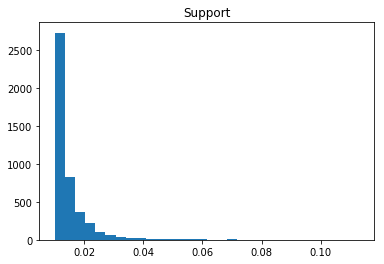

In [32]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.title("Support")

In [33]:
#Exercise 7
rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="confidence",
    min_threshold=0.6, 
    support_only=False
)
rules.loc[0:6]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SPACEBOY BEAKER),( DOLLY GIRL BEAKER),0.0172,0.0168,0.0126,0.732558,43.604651,0.012311,3.676313
1,( DOLLY GIRL BEAKER),(SPACEBOY BEAKER),0.0168,0.0172,0.0126,0.750000,43.604651,0.012311,3.931200
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0208,0.0580,0.0160,0.769231,13.262599,0.014794,4.082000
3,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0208,0.0498,0.0142,0.682692,13.708681,0.013164,2.994570
4,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.0302,0.0580,0.0202,0.668874,11.532313,0.018448,2.844840
5,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.0282,0.0580,0.0212,0.751773,12.961604,0.019564,3.794914
6,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.0380,0.0580,0.0254,0.668421,11.524501,0.023196,2.840952


In [34]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 5070


In [35]:
rules2 = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="lift",
    min_threshold=50, 
    support_only=False
)
rules2.loc[0:6]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",(POPPY'S PLAYHOUSE LIVINGROOM ),0.0136,0.0148,0.0102,0.750000,50.675676,0.009999,3.940800
1,(POPPY'S PLAYHOUSE LIVINGROOM ),"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",0.0148,0.0136,0.0102,0.689189,50.675676,0.009999,3.173635
2,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...","(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS...",0.0140,0.0136,0.0120,0.857143,63.025210,0.011810,6.904800
3,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS...","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS ...",0.0136,0.0140,0.0120,0.882353,63.025210,0.011810,8.381000
4,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY TEA ...","(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...",0.0160,0.0138,0.0112,0.700000,50.724638,0.010979,3.287333
5,"(PINK REGENCY TEACUP AND SAUCER, REGENCY TEA P...","(GREEN REGENCY TEACUP AND SAUCER, REGENCY TEA ...",0.0138,0.0160,0.0112,0.811594,50.724638,0.010979,5.222769
6,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY TEA ...","(REGENCY TEA PLATE GREEN , ROSES REGENCY TEACU...",0.0124,0.0166,0.0106,0.854839,51.496308,0.010394,6.774533


In [36]:
print("Number of Associations: {}".format(rules2.shape[0]))

Number of Associations: 26


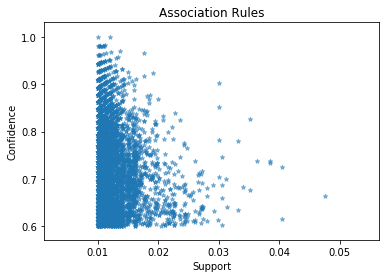

In [37]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()


Text(0.5, 1.0, 'Confidence')

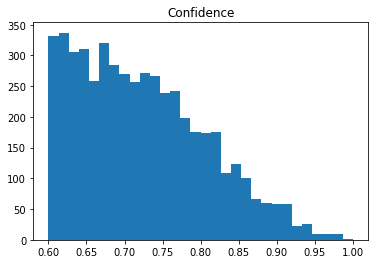

In [38]:
rules.hist("confidence", grid=False, bins=30)
plt.title("Confidence")


Text(0.5, 1.0, 'Lift')

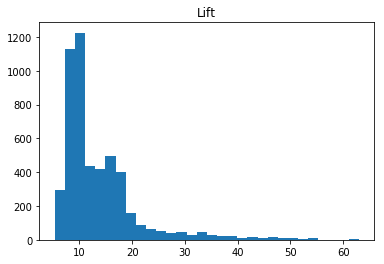

In [39]:
rules.hist("lift", grid=False, bins=30)
plt.title("Lift")


Text(0.5, 1.0, 'Leverage')

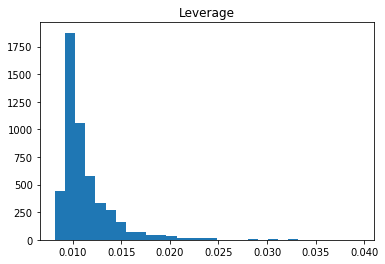

In [40]:
rules.hist("leverage", grid=False, bins=30)
plt.title("Leverage")


Text(0.5, 1.0, 'Conviction')

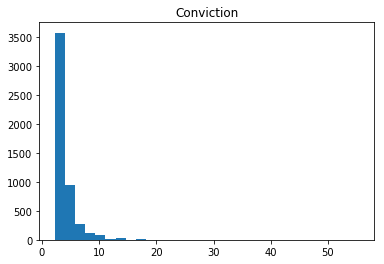

In [41]:
plt.hist(
    rules[numpy.isfinite(rules['conviction'])].conviction.values, 
    bins = 30
)
plt.title("Conviction")
